# Tutorial 1a. Introduction to Statistical Quantities in Wind Engineering

### Description : Wind data (Measured/Simulated) in Wind engineering is recorded as a time series in general. Typical quantities measured are velocity at a reference height or pressure measured at locations of interest along the structure. Evaluating the statistical quantities of these time series is a crucial task in wind engineering. Here, in this tutorial,  a time series is generated and analyzed. Various statistical quantities introduced in the lecture are demonstrated for a generated signal.  Extreme value statistic tools introduced in the lecture are also demonstrated for the generated signal. Some exercises are proposed.

#### The students are adviced to complete the excercises proposed

Project : Lecture - Structural Wind Engineering WS18-19 
        Chair of Structural Analysis @ TUM - A. Michalski, R. Wuchner, M. Pentek
        
Author : kodakkal.anoop@tum.de, mate.pentek@tum.de

##### Contents:

 1. Generating a time series as a superposition of constant, cosine and random signals 
 2. Introduction of some common statistical tools in python
 3. Interquartile range and box plots
 4. Probability Distribution Function (PDF) 
 5. Fast Fourier Transform (FFT) 
 6. Extreme Value statistics 
 7. Block Maxima (BM)
 8. Peak Over Threshold (POT)

In [1]:
# import
import numpy as np
import scipy
from matplotlib import pyplot as plt
from OwnFunctionDef import*

#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [2]:
# start time
startTime = 0.0
# end time
endTime = 10.0
# steps 
n = 10000
# time step
dTime = endTime / (n-1)
# time instances
# generate grid size vectors 1D
arrayTime = np.arange(startTime, endTime+dTime, dTime)

#### Generating signals in Time Domain

#####  Three signals are created. 
1. A Harmonic (cosine) signal with given amplitude and frequency
2. A constant signal with given amplitude
3. A random signal with specified distribution and given properties

###### 1. Cosine signal with given amplitude and frequency 

In [3]:
freq = 10
amplCos = 1
signalCos = amplCos * np.cos( 2*np.pi* freq * arrayTime)

###### Let's look at the plot to see how the signal look like

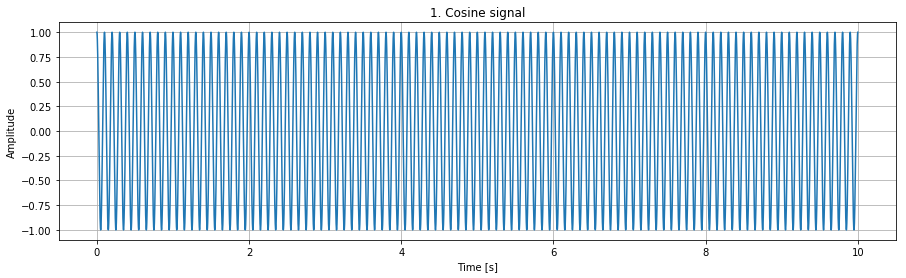

In [4]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalCos)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('1. Cosine signal')
plt.grid(True)

### Exercise 01 : Try different frequencies 

Try different frequencies for the harmonic function. What is the relation between frequency and time period ? what do you observe in the plots?

###### 2. Constant signal with given amplitude

In [5]:
amplConst = 10
signalConst = amplConst * np.ones(len(arrayTime))

###### Let's look at the plot to see how the signal look like

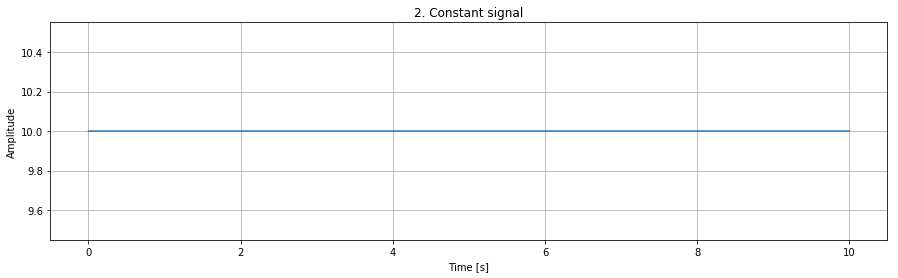

In [6]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalConst)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('2. Constant signal')
plt.grid(True)

###### 3. Random signal with specified distribution and given properties

In [7]:
# normal random signal with given mean m = 0 and standard dev sd = 0.25 ->
signalRand = np.random.normal(0, 0.25, len(arrayTime))


###### Let's look at the plot to see how the signal look like

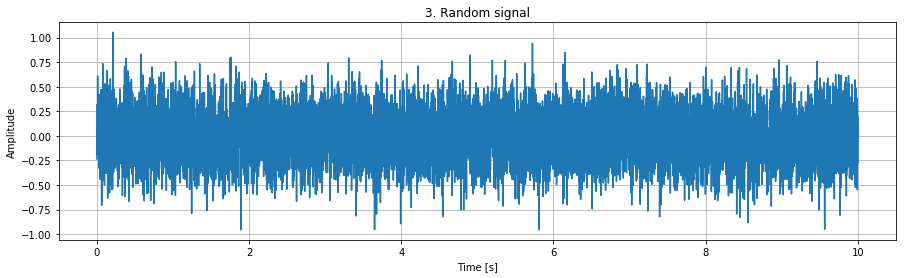

In [8]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalRand)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('3. Random signal')
plt.grid(True)

### Exercise 02 : Different distributions and parameters for random signal 

Instead of the [normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) distribution for the random signal try [lognormal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html), [beta](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html), [standard normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) and [uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) distribution

In [9]:
#signalRand = np.random.lognormal(0, 0.25, len(arrayTime))
#signalRand = np.random.beta(1, 0.25, len(arrayTime))
#signalRand = np.random.rand(len(arrayTime))
#signalRand = np.random.uniform(0,1,len(arrayTime))

#### 4. General signal - superposition of the above three signals


A general signal is represented as a superposition of the above three - constant, cosine and random signals

###### Superposed signal

The above three signals are superposed with corresponding weights

In [10]:
coefSignal1 = 1
coefSignal2 = 0.25
coefSignal3 = 1
signalSuperposed = coefSignal1 * signalConst + coefSignal2 * signalCos + coefSignal3 * signalRand

###### Let's look at the plot to see how the signal look like

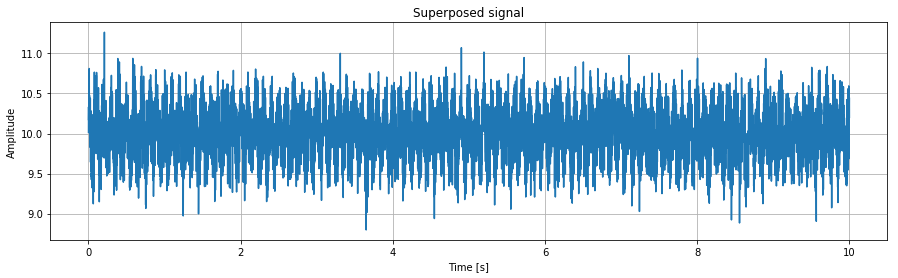

In [11]:
plt.figure(figsize=(15, 4))
plt.plot(arrayTime,signalSuperposed)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('Superposed signal')
plt.grid(True)

### Exercise 03 : Different weights for superposition

Try different weights for the superposition. What do you observe in the plots ?

Try different frequencies for the cosine function and observe the difference in the superposed signal. 

## Check Point -  1 : Discussion

#### Discuss among groups the observations and outcomes from exercise 01-03

## 1.1 Statistical tools and quantities used to evaluate the signal

##### The following statistical quantities are computed for the given signal. 
1. Mean (Arithmetic) 
2. Root Mean Square (RMS)
3. Median 
4. Standard deviation
5. Skewness

Recall from the lecture the definitions of these quantities. 
These quantites can be computed using the inbuilt functions of numpy
[Mean (Arithmatic)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
[Median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html)
[Standard deviation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy.std)
and
[Skewness](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html)


###### 1. Cosine signal with given amplitude and frequency 

In [12]:
signalCosMean = np.mean(signalCos) * np.ones(len(arrayTime))
signalCosSTD = np.std(signalCos) * np.ones(len(arrayTime))
signalCosRMS = np.sqrt(np.mean(np.square(signalCos)))  * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalCos))
print('STD: ',np.std(signalCos))
print('RMS: ',np.sqrt(np.mean(np.square(signalCos))))
print('Median: ',np.median(signalCos))
print('Skewness: ',(np.mean(signalCos) - np.median(signalCos))/np.std(signalCos))


Mean:  9.99999999999968e-05
STD:  0.7071421285710532
RMS:  0.7071421356417675
Median:  0.00015709533381615863
Skewness:  -8.074095929136108e-05


###### 2. Constant signal with given amplitude

In [13]:
signalConstMean = np.mean(signalConst) * np.ones(len(arrayTime))
signalConstSTD = np.std(signalConst) * np.ones(len(arrayTime))
signalConstRMS = np.sqrt(np.mean(np.square(signalConst))) * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalConst))
print('STD: ',np.std(signalConst))
print('RMS: ',np.sqrt(np.mean(np.square(signalConst))))
print('Median: ',np.median(signalConst))
print('Skewness: ',(np.mean(signalConst) - np.median(signalConst))/np.std(signalConst))

Mean:  10.0
STD:  0.0
RMS:  10.0
Median:  10.0
Skewness:  nan


/home/kodakkal/Software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


###### 3. Random signal with specified distribution and given properties

In [14]:
signalRandMean = np.mean(signalRand) * np.ones(len(arrayTime))
signalRandSTD = np.std(signalRand) * np.ones(len(arrayTime))
signalRandRMS = np.sqrt(np.mean(np.square(signalRand))) * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalRand))
print('STD: ',np.std(signalRand))
print('RMS: ',np.sqrt(np.mean(np.square(signalRand))))
print('Median: ',np.median(signalRand))
print('Skewness: ',(np.mean(signalRand) - np.median(signalRand))/np.std(signalRand))

Mean:  -0.004801498159824593
STD:  0.2520914129231603
RMS:  0.2521371350161934
Median:  -0.005759158991124773
Skewness:  0.003798863357523738


#### Superposed signal


In [15]:
signalSuperposedMean = np.mean(signalSuperposed) * np.ones(len(arrayTime))
signalSuperposedSTD = np.std(signalSuperposed) * np.ones(len(arrayTime))
signalSuperposedRMS = np.sqrt(np.mean(np.square(signalSuperposed))) * np.ones(len(arrayTime))
print('Mean: ',np.mean(signalSuperposed))
print('STD: ',np.std(signalSuperposed))
print('RMS: ',np.sqrt(np.mean(np.square(signalSuperposed))))
print('Median: ',np.median(signalSuperposed))
print('Skewness: ',(np.mean(signalSuperposed) - np.median(signalSuperposed))/np.std(signalSuperposed))

Mean:  9.995223501840176
STD:  0.30894318625124734
RMS:  9.999996937202994
Median:  9.993659490934697
Skewness:  0.0050624547654123655


###### What does the Mean, Median, Mode, RMS value, Standard deviation, and Skewness physically mean?  

### Histogram of the signals

The variation of each signal with time and their histograms are plotted

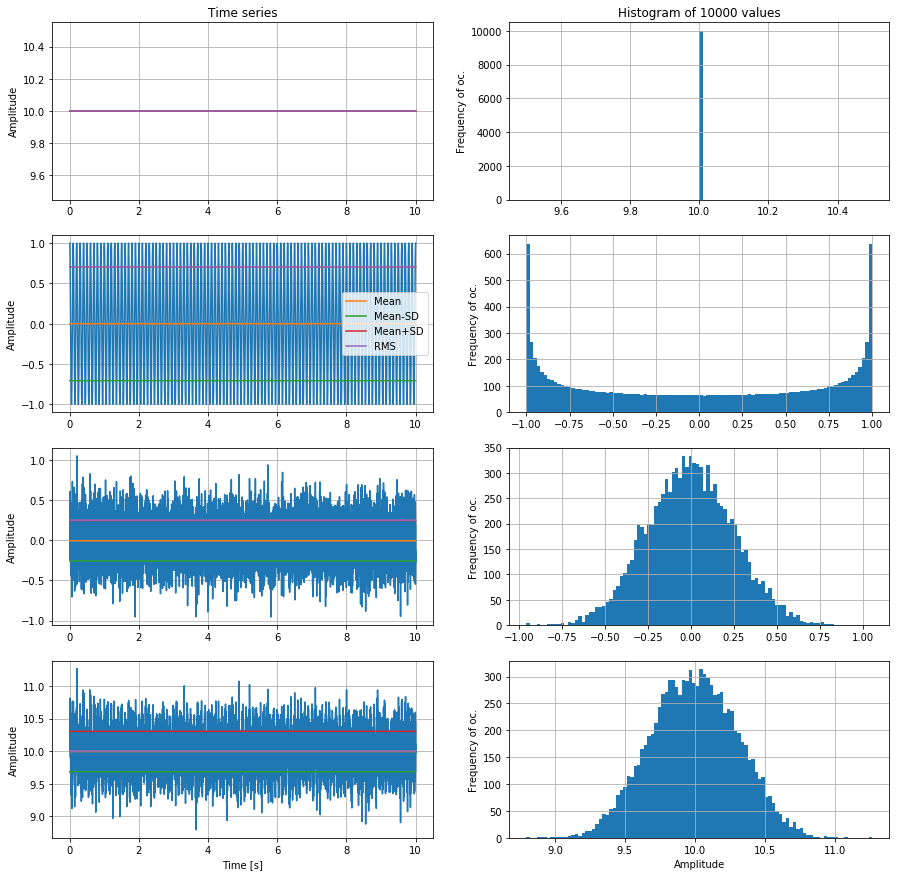

In [16]:
plt.rcParams["figure.figsize"] = (15,15)
plt.figure(1)
# const
plt.subplot(4, 2, 1)
plt.plot(arrayTime,signalConst,
         arrayTime,signalConstMean,
         arrayTime,signalConstMean-signalConstSTD,
         arrayTime,signalConstMean+signalConstSTD,
         arrayTime,signalConstRMS)
plt.ylabel('Amplitude')
plt.title('Time series')
plt.grid(True)

bins = 100
plt.subplot(4, 2, 2)
plt.hist(signalConst,bins)
plt.title('Histogram of ' + str(n) +' values')
plt.ylabel('Frequency of oc.')
plt.grid(True)

# cos
plt.subplot(4, 2, 3)
plt.plot(arrayTime,signalCos) 
plt.plot(arrayTime,signalCosMean,label = 'Mean') 
plt.plot(arrayTime,signalCosMean-signalCosSTD,label = 'Mean-SD') 
plt.plot(arrayTime,signalCosMean+signalCosSTD,label = 'Mean+SD') 
plt.plot(arrayTime,signalCosRMS,label = 'RMS') 
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 2, 4)
plt.hist(signalCos,bins)
plt.ylabel('Frequency of oc.')
plt.grid(True)

# rand
plt.subplot(4, 2, 5)
plt.plot(arrayTime,signalRand,
         arrayTime,signalRandMean,
         arrayTime,signalRandMean-signalRandSTD,
         arrayTime,signalRandMean+signalRandSTD,
         arrayTime,signalRandRMS)
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(4, 2, 6)
plt.hist(signalRand,bins)
plt.ylabel('Frequency of oc.')
plt.grid(True)

# superposed
plt.subplot(4, 2, 7)
plt.plot(arrayTime,signalSuperposed,
         arrayTime,signalSuperposedMean,
         arrayTime,signalSuperposedMean-signalSuperposedSTD,
         arrayTime,signalSuperposedMean+signalSuperposedSTD,
         arrayTime,signalSuperposedRMS)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.grid(True)

plt.subplot(4, 2, 8)
plt.hist(signalSuperposed,bins)
plt.ylabel('Frequency of oc.')
plt.xlabel('Amplitude')
plt.grid(True)

### Interquartile range and percentile 

The [interquartile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range) , also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion. This is computed as the difference between 75th and 25th percentiles, or between upper and lower quartiles. In statistics of extreme values the interquartile range is also considered along with standard deviation as a measure of the dispersion.
The [Percentile](https://en.wikipedia.org/wiki/Percentile)is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall. These quantites can be computed using the inbuilt functions of numpy
[interquartile range (IQR)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html)
[Percentile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html)

In [17]:
iqr = scipy.stats.iqr(signalSuperposed)
q75, q25 = np.percentile(signalSuperposed, [75 ,25])
print('Interquartile range = ',iqr, 'Interquantile range computed = ', q75-q25)

Interquartile range =  0.4313273213705795 Interquantile range computed =  0.4313273213705795


The [Boxplots](https://en.wikipedia.org/wiki/Box_plot) , can be obtained from the interquartile range to identify possible outliers. The box indicate the middle quartile and the lines extending indicating the variability outside the lower and upper quartiles. The in built python function [boxplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) can be used for plotting

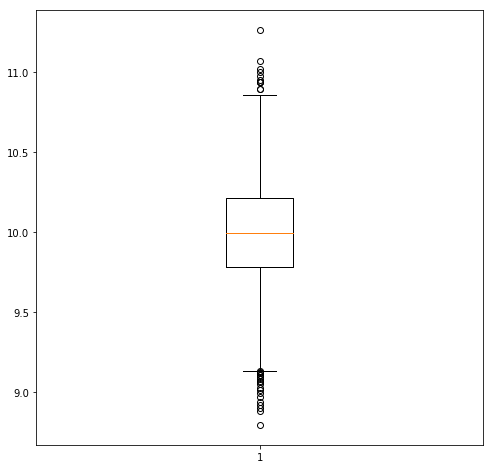

In [18]:
plt.rcParams["figure.figsize"] = (8,8)
plt.figure()
plt.boxplot(signalSuperposed)
plt.show()

### Probability Distribution function (PDF) and Cumulative Distribution Function (CDF) 

The PDF and CDF of the signals are derived and are plotted later. Recall from the lecture the definitions of PDF, CDF of a continuous random variables

##### Tip: Have a look at the CalcForPDF  function in the "OwnFunctionDef.py" for details 

In [19]:
# const
[pdfConstX,pdfConst] = CalcForPDF(signalConst,'Normal')

# cos
[pdfCosX,pdfCos] = CalcForPDF(signalCos)

# rand
[pdfRandX,pdfRand] = CalcForPDF(signalRand)

# superposed
[pdfSuperposedX,pdfSuperposed] = CalcForPDF(signalSuperposed)

### Converting to Frequency domain - Fast Fourier Transform  (FFT) 

FFT computes the frequency contents of the given signal. Recall from the lecture the basic definitions and procedure for FFT

##### Tip: Have a look at the CalcForFFT function in the "OwnFunctionDef.py"  for details 

In [20]:
# const
samplingFreq= (n-1)/endTime
[freqHalfConst,signalFFTConst] = CalcForFFT(signalConst,samplingFreq)

# cos
samplingFreq= (n-1)/endTime
[freqHalfCos,signalFFTCos] = CalcForFFT(signalCos,samplingFreq)

# rand
samplingFreq= (n-1)/endTime
[freqHalfRand,signalFFTRand] = CalcForFFT(signalRand,samplingFreq)

# superposed
samplingFreq= (n-1)/endTime 
[freqHalfSuperposed,signalFFTSuperposed] = CalcForFFT(signalSuperposed,samplingFreq)

Constant Signal


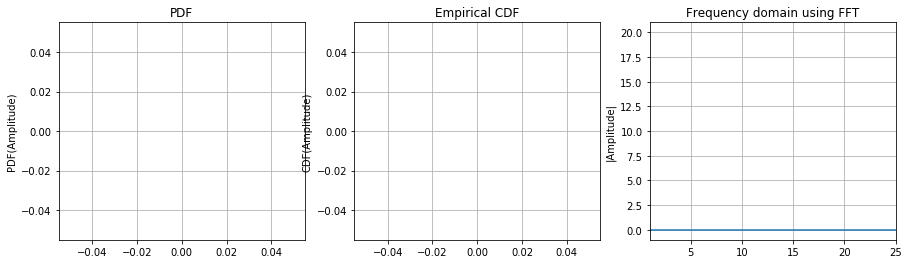

Cosine Signal


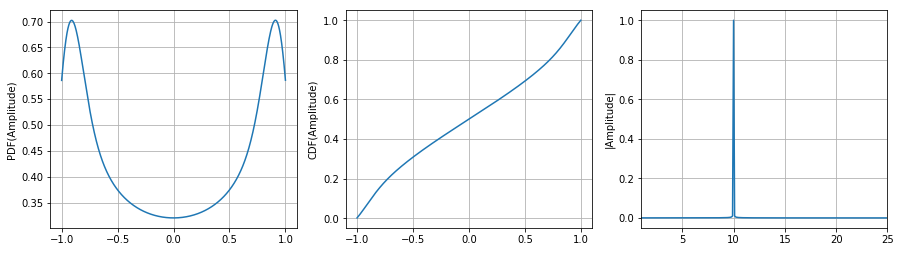

Random Signal


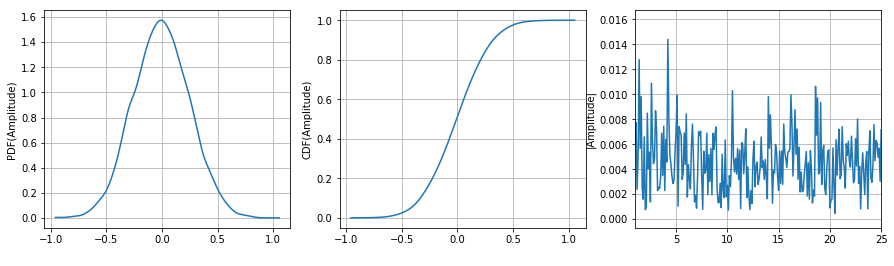

Superposed Signal


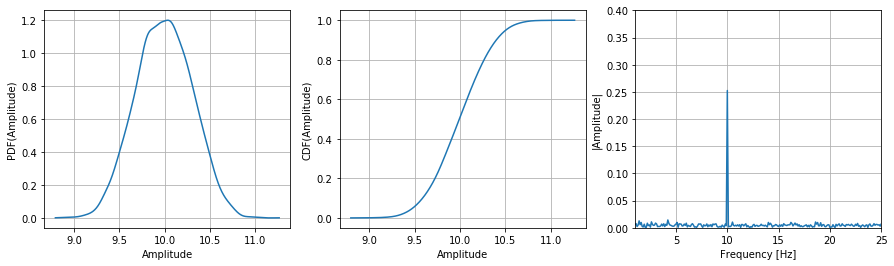

In [21]:
## pdf, cdf and frequency domain
print('Constant Signal')
plt.rcParams["figure.figsize"] = (15,4)
plt.figure(2)
# const
plt.subplot(1,3,1)
plt.plot(pdfConstX, pdfConst)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.title('PDF')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(pdfConstX,np.cumsum(pdfConst))
plt.ylabel('CDF(Amplitude)')
plt.title('Empirical CDF')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfConst,signalFFTConst)
plt.xlim([1, 25]);
plt.ylabel('|Amplitude|')
plt.title('Frequency domain using FFT')
plt.grid(True)
plt.show()


print('Cosine Signal')
plt.figure(2)
# cos
plt.subplot(1,3,1)
plt.plot(pdfCosX, pdfCos)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

ecdfCos = CalcForECDF(pdfCosX,pdfCos)

plt.subplot(1,3,2)
plt.plot(pdfCosX,ecdfCos)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfCos,signalFFTCos)
plt.xlim([1, 25]);
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

print('Random Signal')
# rand
plt.figure(3)
plt.subplot(1,3,1)
plt.plot(pdfRandX, pdfRand)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

ecdfRand = CalcForECDF(pdfRandX,pdfRand)

plt.subplot(1,3,2)
plt.plot(pdfRandX,ecdfRand)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfRand,signalFFTRand)
plt.xlim([1, 25]);
plt.ylabel('|Amplitude|')
plt.grid(True)

plt.show()
# superposed

print('Superposed Signal')
plt.figure(4)
plt.subplot(1,3,1)
plt.plot(pdfSuperposedX, pdfSuperposed)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

ecdfSuperposed = CalcForECDF(pdfSuperposedX,pdfSuperposed)

plt.subplot(1,3,2)
plt.plot(pdfSuperposedX,ecdfSuperposed)
plt.ylabel('CDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(freqHalfSuperposed,signalFFTSuperposed)
plt.ylim([0, 0.4])
plt.xlim([1, 25])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

PDF follows the normalized hystograms. Observe the predominant frequency in the superimposed signal. 

### Excercise 04 : Try two or more harmonic function

Try Two or more cosine functions and superimpose them. What difference do you observe ?
What do you observe in the FFT plots? 

## Check Point -  2 : Discussion

#### Discuss among groups the uses of various statistical quantities and their significance

## 1.2 Extreme value statistics

####  The two methods for extreme value analysis of the structure are Block Maxima(BM) and Peak over threshold (POT) are presented . Recall from the lecture the basic definitions and differences between these two parameters. 

The extreme value statistics of the generated superimposed signal generated earlier will be computed in this section. 

In [22]:
signalGiven = signalRand

### Block Maxima (BM)

Recall from the lecture the basics of block maxima. A window size is chosen in computation of BM. The signal will be divided into the given window size. the extrema is extracted at each of the window. The mean,sd and other statistics will be computed for the extremas.

In [23]:
blockSize = np.round(len(signalGiven)/20) #  /20 -> 5% parent size for around
# 0.2% from parent distribution to be in tails 
[indexBM,extremeValuesBM] = ExtractBM(signalGiven,blockSize)
[pdfBMX,pdfBM] = CalcForPDF(extremeValuesBM)

##### Tip: Have a look at the ExtractBM function in the "OwnFunctionDef.py"  for details 

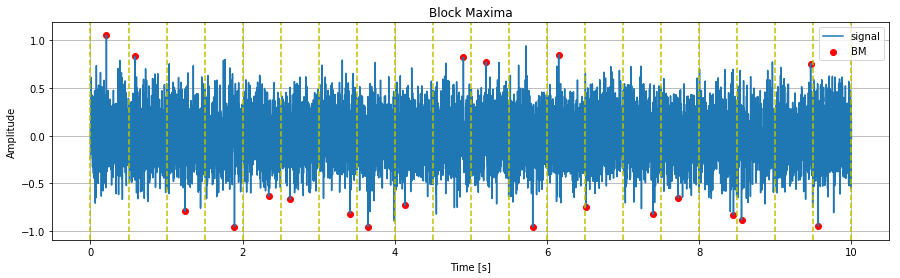

In [24]:
plt.plot(arrayTime,signalGiven,label  ='signal')
plt.scatter(arrayTime[indexBM],signalGiven[indexBM], marker = 'o', color = 'r', label='BM')
plt.ylabel('Amplitude')
plt.title('Block Maxima')
plt.xlabel('Time [s]')
for index in np.arange(len(indexBM)):
    plt.axvline(x=arrayTime[np.int(blockSize*index)], color='y',linestyle='--')
plt.axvline(x=arrayTime[-1], color='y',linestyle='--')
plt.legend()
plt.grid(True)

__Note__ Deciding the block size  in computation of BM can be critical. If the number of blocks is too less it may lead to large variance. If the window size is too small this may lead to large bias. The block size is decided as a trade off between the bias and the variance   

### The Generalized Extreme Value distribution (GEV) 

The generalized extreme value (GEV) distribution function is a best fit to block maxima of data. Recall the details of the [extreme value distributions (GEV)](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution). The scipy implementation of [GEV](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html) can be used


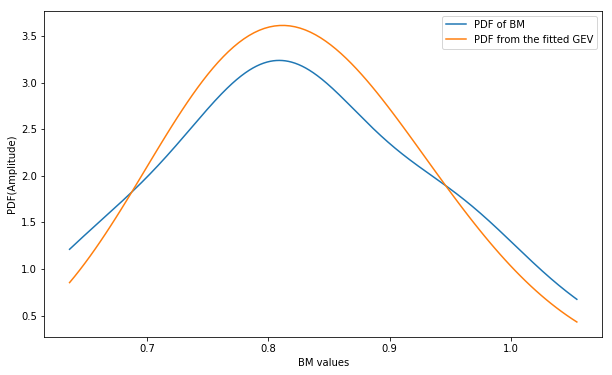

In [25]:
from scipy.stats import genextreme as gev
shape_bm, loc_bm, scale_bm = gev.fit(extremeValuesBM)

pdf_x_bm = np.linspace(np.min(extremeValuesBM), np.max(extremeValuesBM), 100)
pdf_bm = gev.pdf(pdf_x_bm, shape_bm, loc_bm, scale_bm)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(pdfBMX, pdfBM, label = 'PDF of BM')
plt.plot(pdf_x_bm, pdf_bm, label = 'PDF from the fitted GEV')
plt.xlabel('BM values')
plt.ylabel('PDF(Amplitude)')
plt.legend()
plt.show()

__Note__ What does the parameters of GEV distribution indicates ? How to classify the given extreme to be Gumbel (type I GEV), Frêchet (type II GEV) or Weibull (type III) distribution based on these parameters? Discuss   

### Peak Over Threshold (POT)

Recall from the lecture the basics of peak over threshold. A prescribed threshold is set in the beginning of the analysis. Every value exceeding this predefined threshold is considered an extrema. The threshold has to be decided in the beginning of the analysis

In [26]:
signalMean = np.mean(signalGiven)
signalSTD = np.std(signalGiven)
thresholdParam = 2.5
thresholdValue = signalMean + thresholdParam * signalSTD # for around 0.25% from parent 
# distribution to be in tails 
[indexEndTimePOT,extremeValuesEndTimePOT] = ExtractPOT(signalGiven,thresholdValue)
[pdfEndTimePOTX,pdfEndTimePOT] = CalcForPDF(extremeValuesEndTimePOT)
print(thresholdValue)

0.6254270341480761


Here, the threshold is set as mean plus 3 times standard deviation. For a normal distributed random variable this interval  $\mu +- \sigma$ is found to have 99.75% density inside. 

##### Tip: Have a look at the ExtractPOT function in the "OwnFunctionDef.py"  for details 

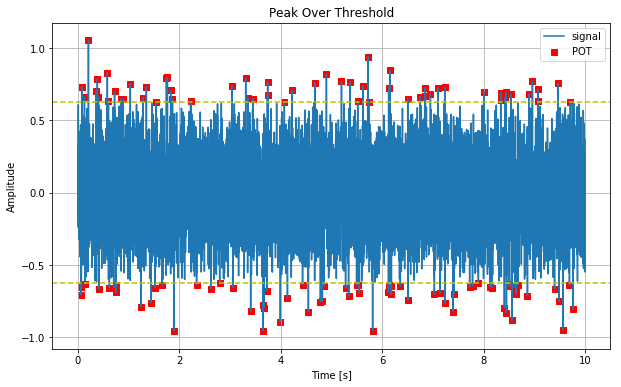

In [27]:
plt.plot(arrayTime,signalGiven, label = 'signal')
plt.scatter(arrayTime[indexEndTimePOT],signalGiven[indexEndTimePOT], marker ='s', color = 'r', label = 'POT')
plt.ylabel('Amplitude')
plt.title('Peak Over Threshold')
plt.axhline(y=thresholdValue,color='y',linestyle='--')
plt.axhline(y=-thresholdValue,color='y',linestyle='--')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

### Run-time evaluation of POT

In many situation the whole data is not available in the begining of the analysis. The POT need to be evaluated on the go. 

The mean and standard deviation used for defining the threshod criteria are also updated as new data becomes available. Here, the run-time behavior is replicated by considering the new values form the signal.    

##### Tip: Have a look at the RunTimeEvalOwn function in the "OwnFunctionDef.py"  for details 

In [28]:
[resMean,resRMS,resSTD,resMedian,resSkew,resThres,indexRunTimePOT,extremeValuesRunTimePOT] = RunTimeEvalOwn(signalGiven,thresholdParam)
[pdfRunTimePOTX,pdfRunTimePOT] = CalcForPDF(extremeValuesRunTimePOT)

/media/kodakkal/C/HiWi/Gitlab/JupyterNotebookFortutorials/Ex_01_statistics/OwnFunctionDef.py:200: RuntimeWarning: divide by zero encountered in double_scalars
  standarddev = numpy.sqrt((part1 - 2* meannew * part2 + meannew*meannew* i)/(i-1))


Elapsed time for RunTimeEvalOwn function evaluation:  4.014502072008327 s
 


##### Let's plot the run-time statistical quantities and look how they evolve with time

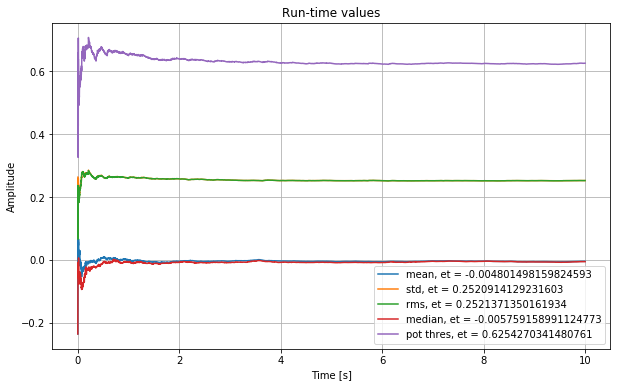

In [29]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(arrayTime,resMean,arrayTime,resSTD,arrayTime,resRMS,arrayTime,resMedian,arrayTime,resThres)
plt.legend(['mean, et = '+ str(numpy.mean(signalGiven)),'std, et = ' + str(numpy.std(signalGiven)),'rms, et = ' + str(numpy.sqrt(numpy.mean(numpy.square(signalGiven)))),'median, et = '+ str(numpy.median(signalGiven)),'pot thres, et = '+ str(thresholdValue)])
plt.ylabel('Amplitude')
plt.title('Run-time values')
plt.xlabel('Time [s]')
plt.grid(True)

##### Let's plot the run-time evaluation of POT

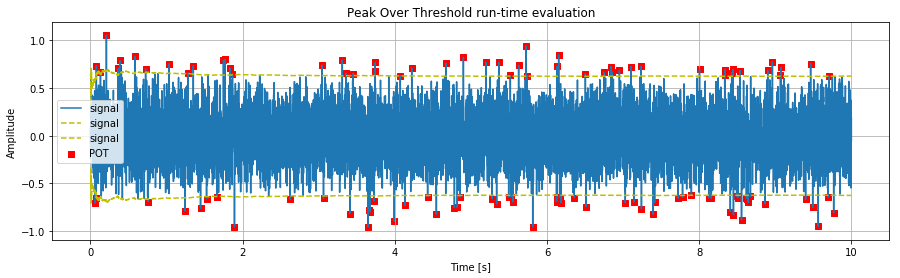

In [30]:
plt.rcParams["figure.figsize"] = (15,4)
plt.plot(arrayTime,signalGiven, label = 'signal')
plt.scatter(arrayTime[indexRunTimePOT],signalGiven[indexRunTimePOT], marker ='s', color = 'r', label = 'POT')
plt.ylabel('Amplitude')
plt.title('Peak Over Threshold run-time evaluation')
plt.plot(arrayTime,resMean + thresholdParam * resSTD, label = 'signal',color='y',linestyle='--')
plt.plot(arrayTime,-resMean - thresholdParam * resSTD, label = 'signal',color='y',linestyle='--')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

### The Generalized Pareto distribution (GP) 

The generalized Pareto (GP) distribution function is a best fit to peak over threshold data. Recall the details of the [generalized Pareto (GP) distribution](https://en.wikipedia.org/wiki/Generalized_Pareto_distribution). The scipy implementation of [GP](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genpareto.html) can be used


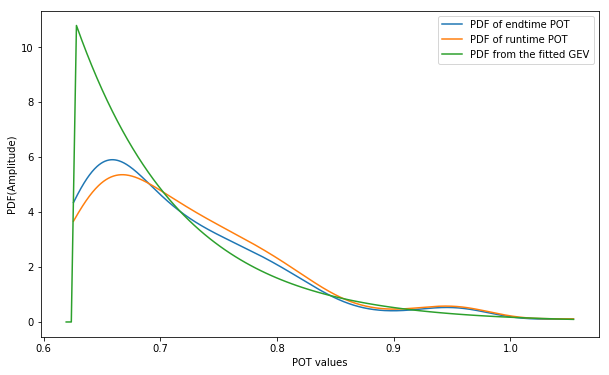

In [31]:
from scipy.stats import genpareto as gp
shape_pot, loc_pot, scale_pot = gp.fit(extremeValuesEndTimePOT,0 , loc = thresholdValue , scale = 1)

pdf_x_pot = np.linspace(0.99 * np.min(extremeValuesEndTimePOT), np.max(extremeValuesEndTimePOT), 100)
pdf_pot = gp.pdf(pdf_x_pot, shape_pot, loc_pot, scale_pot)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(pdfEndTimePOTX, pdfEndTimePOT, label = 'PDF of endtime POT')
plt.plot(pdfRunTimePOTX, pdfRunTimePOT, label = 'PDF of runtime POT')
plt.plot(pdf_x_pot, pdf_pot, label = 'PDF from the fitted GEV')
plt.xlabel('POT values')
plt.ylabel('PDF(Amplitude)')
plt.legend()
plt.show()

### Excercise 05: Observe the changes with varying the number of blocks and threshold value

Change __'blockSize'__ and __'thresholdParam'__. Observe the differnce,  comment and discuss 

## Check Point -  3 : Discussion

#### Discuss among groups the observations and outcomes regarding extreme value statistics

### Assignment : Compute the extreme value statistics for the given signal

Two data sets 'givenData1.dat' and 'givenData2.dat' are provided which contains the time domain data of bending moment. Compute the statistical quantities of the given data. Plot the corresponding functions. Compute the BM and POT for these given data sets.

In [32]:
#fileName = 'givenData1.dat'  # has 5350 values for each column
#timeValues = numpy.loadtxt(fileName, skiprows=0, usecols = (0,)) # in [s]
#bendingMomentValues = numpy.loadtxt(fileName, skiprows=0, usecols = (1,)) # in [kNm]

#fileName = 'givenData2.dat' # has 53491 values for each column
#timeValues = (numpy.loadtxt(fileName, skiprows=0, usecols = (0,))-1000)/100  # shift 1000 [cs] then divide by 100 to get [s]
#bendingMomentValues = numpy.loadtxt(fileName, skiprows=0, usecols = (1,))/1000 # to get [kNm] from [Nm] divide by 1000

__TODO__ add the refernce of extreme value textvook
